In [1]:
from math import pi
from pathlib import Path

import numpy as np
import pandas as pd

from cowerc_adsorption import (
    PhysicalParams,
    Simulation,
    ExperimentalBreakthroughData,
    plot_btc_and_data,
)

In [2]:
excel_file = Path("../../.data/Data and Column Properties.xlsx")
sheet_name = "WW All Contaminants 0.45-min"

In [3]:
# Read Emma's excel report
xls_setup = pd.read_excel(excel_file, sheet_name=sheet_name, nrows=18, usecols="A:B", index_col=0)
setup = xls_setup.to_dict()["Unnamed: 1"]

xls_setup

,Unnamed: 1
Design Parameters,
Column Diameter (cm),0.660000
Column Area (cm^2),0.340000
Particle Size (cm),0.016800
Column Diameter/Particle Size Ratio,39.285714
Reynold's Number,0.270000
Bed Voidage (ε),0.500000
Hydraulic Loading Rate (cm/s),0.080000
EBCT,0.260000
Flow Rate (mL/s),0.028000


In [4]:
xls_influent = pd.read_excel(excel_file, sheet_name=sheet_name, skiprows=11, nrows=4, usecols="D:J")
xls_influent.set_index("Unnamed: 3", inplace=True)

print("Influent in ng/L")
xls_influent

Influent in ng/L


,PFOA,PFHxA,PFHxS,BEZ,DCF,PFBA
Unnamed: 3,,,,,,
Inf 1,412.150000,320.250000,443.000000,422.100000,663.0,517.200000
Inf 2,470.100000,321.500000,483.150000,431.750000,678.8,520.350000
Inf 3,515.700000,330.800000,543.750000,434.150000,690.1,538.600000
Inf AVG,465.983333,324.183333,489.966667,429.333333,677.3,525.383333


In [5]:
xls_btc = pd.read_excel(excel_file, sheet_name=sheet_name, header=19, usecols="A:Q")
xls_btc.rename(columns=lambda x: x.strip(), inplace=True)
xls_btc

,Sample ID,Time (min.),Cum. Vol.,Bed Vol Passed (BV),Specific Throughput,PFOA,PFOA C/C0,PFHxA,PFHxA C/C0,PFHxS,PFHxS C/C0,BEZ,BEZ C/C0,DCF,DCF C/C0,PFBA,PFBA C/C0
0,1.0,324.545455,535.5,714.000000,3212.357528,9.60,0.020602,1.70,0.005244,0.00,0.000000,0.00,0.000000,0.00,0.000000,69.95,0.133141
1,2.0,1337.878788,2207.5,2943.333333,13242.351530,28.95,0.062127,1.15,0.003547,6.75,0.013776,12.55,0.029231,5.10,0.007530,498.75,0.949307
2,3.0,2165.151515,3572.5,4763.333333,21430.713857,0.85,0.001824,6.00,0.018508,0.00,0.000000,80.45,0.187384,8.75,0.012919,548.65,1.044285
3,4.0,3139.696970,5180.5,6907.333333,31076.784643,10.90,0.023391,17.80,0.054907,5.20,0.010613,172.80,0.402484,33.20,0.049018,607.60,1.156489
4,5.0,3876.060606,6395.5,8527.333333,38365.326935,5.80,0.012447,37.90,0.116909,4.95,0.010103,236.75,0.551436,63.20,0.093312,535.55,1.019351
5,6.0,5099.696970,8414.5,11219.333333,50476.904619,26.80,0.057513,48.20,0.148681,4.55,0.009286,295.45,0.688160,87.95,0.129854,555.30,1.056943
6,7.0,6549.878788,10807.3,14409.733333,64830.833833,6.65,0.014271,100.40,0.309701,0.50,0.001020,373.00,0.868789,172.95,0.255352,539.55,1.026964
7,7.5,7749.878788,12787.3,17049.733333,76708.458308,6.75,0.014485,139.05,0.428924,2.95,0.006021,397.65,0.926203,237.00,0.349919,591.60,1.126035
8,8.0,9669.878788,15955.3,21273.733333,95712.657469,8.05,0.017275,194.10,0.598735,0.00,0.000000,415.25,0.967197,313.70,0.463163,609.15,1.159439
9,9.0,11889.878788,19618.3,26157.733333,117686.262747,24.20,0.051933,276.30,0.852296,6.50,0.013266,383.35,0.892896,474.80,0.701019,575.50,1.095391


In [6]:
porosity = setup["Bed Voidage (ε)"]
lenght = setup["Bed Length (cm)"]

area = 0.25 * pi * setup["Column Diameter (cm)"] ** 2  # cm²
pore_velocity = setup["Flow Rate (mL/min)"] / (area * porosity)  # cm/min

print(f"Porosity: {porosity:.2f}")
print(f"Length: {lenght:.2f}")
print(f"Pore velocity: {pore_velocity:.4f}")

Porosity: 0.50
Length: 2.18
Pore velocity: 9.6458


In [7]:
contaminants = ["PFBA", "BEZ", "PFHxA", "DCF", "PFOA", "PFHxS"]
molecular_weight = {"PFBA": 214.04, "BEZ": 361.8, "PFHxA": 314.05, "DCF": 296.1, "PFOA": 414.1, "PFHxS": 400.11}

c_0 = xls_influent.loc["Inf AVG"][contaminants].to_numpy()  # ng/L
c_0 = c_0 / np.array(list(molecular_weight.values()))  # nmol/L

print("Initial concentrations [nM]:")
for k, v in zip(contaminants, c_0):
    print(f"{k:>6}: {v:.3f}")

Initial concentrations [nM]:
  PFBA: 2.455
   BEZ: 1.187
 PFHxA: 1.032
   DCF: 2.287
  PFOA: 1.125
 PFHxS: 1.225


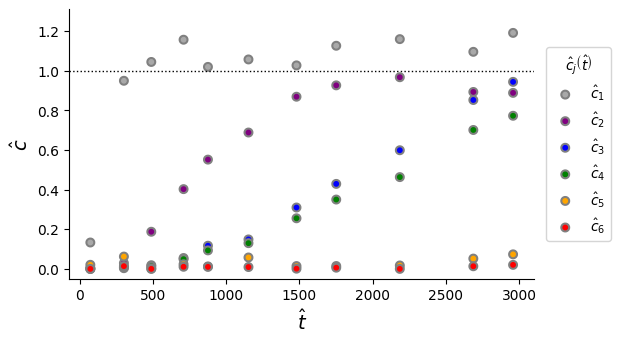

In [8]:
experimental_data = ExperimentalBreakthroughData(
    time=np.round((xls_btc["Time (min.)"] * lenght / pore_velocity), 2).to_numpy(),
    conc=xls_btc[[f"{k} C/C0" for k in contaminants]].to_numpy().T,
    c_0=c_0,
)

experimental_data.plot_breakthrough()

In [9]:
print(*(f"{np.log10(k):.2f}" for k in (9.6e4,)))
print(*(f"{np.log10(k):.2f}" for k in (20, 30, 30, 30, 30, 32)))
print(*(f"{np.log10(k):.2f}" for k in (0.18, 0.03, 0.011, 0.01, 0.003, 0.0025)))

4.98
1.30 1.48 1.48 1.48 1.48 1.51
-0.74 -1.52 -1.96 -2.00 -2.52 -2.60


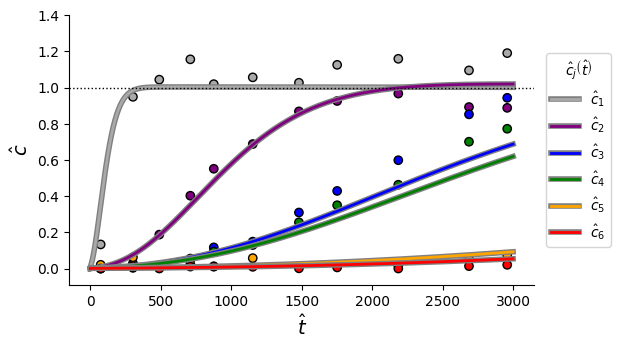

In [10]:
# Trying out some arbitrary parameters

p = PhysicalParams(
    L=lenght,  # cm
    v=pore_velocity,  # cm/min
    n=porosity,  # -
    sm=9.6e4,  # nmol/cm³
    k_ads=(20, 30, 30, 30, 30, 32),  # 1/min
    k_des=(0.18, 0.03, 0.011, 0.01, 0.003, 0.0025),  # 1/min
    C_0=c_0,
)

sim = Simulation(**p.nondim)
sim.end_time = 3000
sim.cfl = 0.80
sim.solve()

display(plot_btc_and_data(sim, experimental_data))

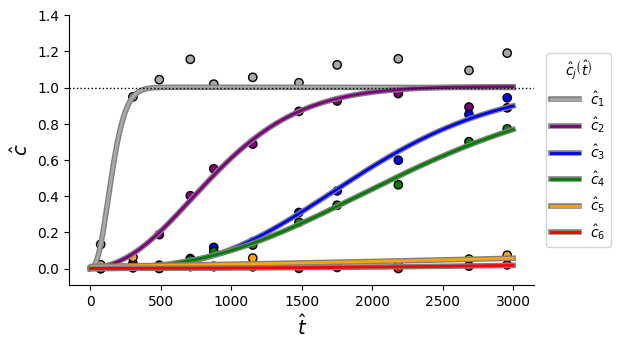

In [11]:
# Fitting data using OSTRICH

optimal_parameter_set = [
    5.416461e00,
    1.553051e00,
    1.484859e00,
    1.721528e00,
    1.605494e00,
    1.306306e00,
    1.569755e00,
    -6.456393e-01,
    -1.486332e00,
    -1.579087e00,
    -1.764643e00,
    -3.047612e00,
    -2.668818e00,
]

optimal_parameter_set = [10**k for k in optimal_parameter_set]

p = PhysicalParams(
    L=lenght,
    v=pore_velocity,
    n=porosity,
    sm=optimal_parameter_set[0],
    k_ads=optimal_parameter_set[1:7],
    k_des=optimal_parameter_set[7:],
    C_0=experimental_data.c_0,
)

sim = Simulation(**p.nondim)
sim.end_time = 3000
sim.cfl = 0.80
sim.solve()

display(plot_btc_and_data(sim, experimental_data))

In [12]:
display(p)

PhysicalParams(L=2.18, v=9.645754126781533, n=0.5, sm=260892.14292143285, k_ads=array([35.73147958, 30.5392945 , 52.66571686, 40.31753763, 20.24445082,
       37.13256928]), k_des=array([0.22613131, 0.03263383, 0.02635803, 0.01719321, 0.00089617,
       0.00214379]), C_0=array([2.4546035 , 1.1866593 , 1.03226662, 2.2874029 , 1.1252918 ,
       1.22457991]))

In [13]:
for k, v in p.nondim.items():
    print(f"{k}: {', '.join(map(lambda x: f'{x:.3E}', v))}")

Dam_ads: 8.076E+00, 6.902E+00, 1.190E+01, 9.112E+00, 4.575E+00, 8.392E+00
Dam_des: 5.111E-02, 7.375E-03, 5.957E-03, 3.886E-03, 2.025E-04, 4.845E-04
kappa: 4.704E-06, 2.274E-06, 1.978E-06, 4.384E-06, 2.157E-06, 2.347E-06
bc: 1.000E+00, 1.000E+00, 1.000E+00, 1.000E+00, 1.000E+00, 1.000E+00
